✅ 3개월 단위 modify_date 구간별 종목 수
                   기간  종목 수
0   2018-12 ~ 2019-01     0
1   2019-02 ~ 2019-03     1
2   2019-04 ~ 2019-05     1
3   2019-06 ~ 2019-07     0
4   2019-08 ~ 2019-09     0
5   2019-10 ~ 2019-11     0
6   2019-12 ~ 2020-01     0
7   2020-02 ~ 2020-03     0
8   2020-04 ~ 2020-05     1
9   2020-06 ~ 2020-07     1
10  2020-08 ~ 2020-09     0
11  2020-10 ~ 2020-11     1
12  2020-12 ~ 2021-01     0
13  2021-02 ~ 2021-03     0
14  2021-04 ~ 2021-05     0
15  2021-06 ~ 2021-07     2
16  2021-08 ~ 2021-09     1
17  2021-10 ~ 2021-11     3
18  2021-12 ~ 2022-01    23
19  2022-02 ~ 2022-03    77
20  2022-04 ~ 2022-05    20
21  2022-06 ~ 2022-07    10
22  2022-08 ~ 2022-09    16
23  2022-10 ~ 2022-11    87
24  2022-12 ~ 2023-01   272
25  2023-02 ~ 2023-03   364
26  2023-04 ~ 2023-05    87
27  2023-06 ~ 2023-07    53
28  2023-08 ~ 2023-09    41
29  2023-10 ~ 2023-11    65
30  2023-12 ~ 2024-01    71
31  2024-02 ~ 2024-03   182
32  2024-04 ~ 2024-05   158
33  2024-06 ~ 2024

C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_26064\1815755682.py:41: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(

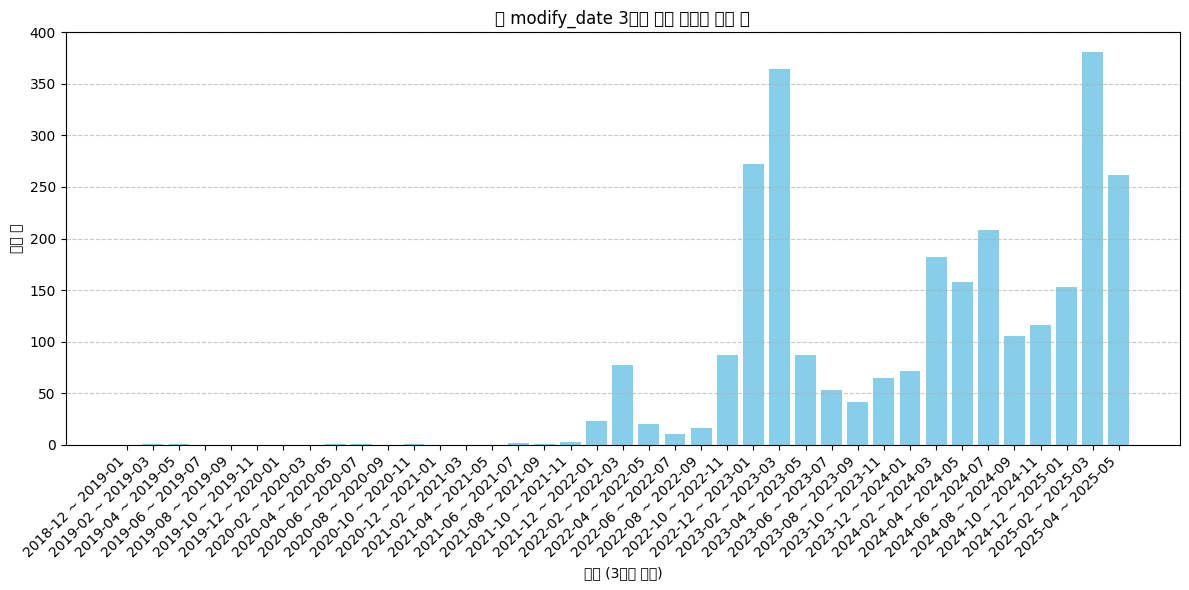

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 1. CSV 파일 불러오기
df = pd.read_csv("ticker_info.csv")

# 2. 날짜 형식으로 변환
df['modify_date'] = pd.to_datetime(df['modify_date'], format='%Y%m%d')

# 3. 날짜 최소값/최대값 구간 정의
min_date = df['modify_date'].min()
max_date = df['modify_date'].max()

# 4. 3개월 단위 구간 생성
bins = pd.date_range(start=min_date, end=max_date + pd.DateOffset(months=2), freq='2MS')
labels = [f"{b.strftime('%Y-%m')} ~ {(b + pd.DateOffset(months=2) - pd.DateOffset(days=1)).strftime('%Y-%m')}" for b in bins[:-1]]

# 5. 구간으로 분할
df['Period'] = pd.cut(df['modify_date'], bins=bins, labels=labels, right=False)

# 6. 각 구간별 종목 수 카운트
period_counts = df['Period'].value_counts().sort_index()

# 7. 결과 출력 (표)
summary_df = pd.DataFrame({
    '기간': period_counts.index,
    '종목 수': period_counts.values
})
print("✅ 3개월 단위 modify_date 구간별 종목 수")
print(summary_df)

# 8. 시각화
plt.figure(figsize=(12, 6))
plt.bar(summary_df['기간'], summary_df['종목 수'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("📅 modify_date 3개월 단위 구간별 종목 수")
plt.xlabel("기간 (3개월 단위)")
plt.ylabel("종목 수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()